In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv")
df_y=df["SalePrice"]
df.drop(["SalePrice","Id"],axis=1,inplace=True)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
drop_col=df.isnull().sum()*100/df.shape[0]
drop_col =drop_col[drop_col>30].keys() #list of columns with missing data

In [5]:
df.drop(columns=drop_col,inplace=True)

<AxesSubplot:>

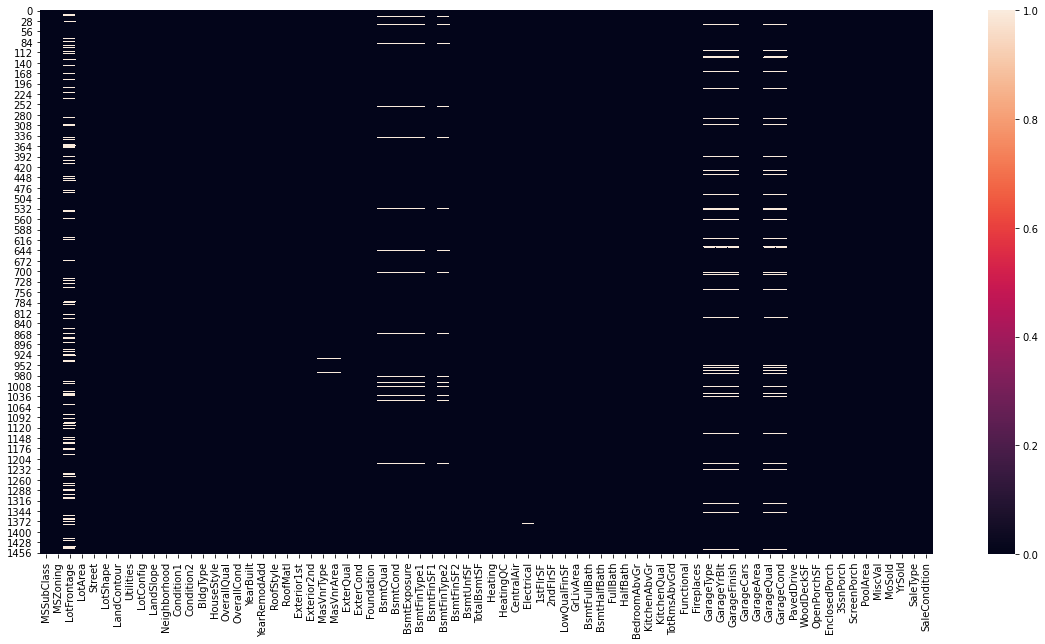

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [7]:
num_col=df.select_dtypes(exclude="O").keys()
cat_col=df.select_dtypes(include="O").keys()

misnum_col=df[num_col].isnull().sum()>0
misnum_col=misnum_col[misnum_col==True].keys()

miscat_col=df[cat_col].isnull().sum()>0

miscat_col=miscat_col[miscat_col==True].keys()

numis_df=df[misnum_col]
cat_df=df[cat_col]

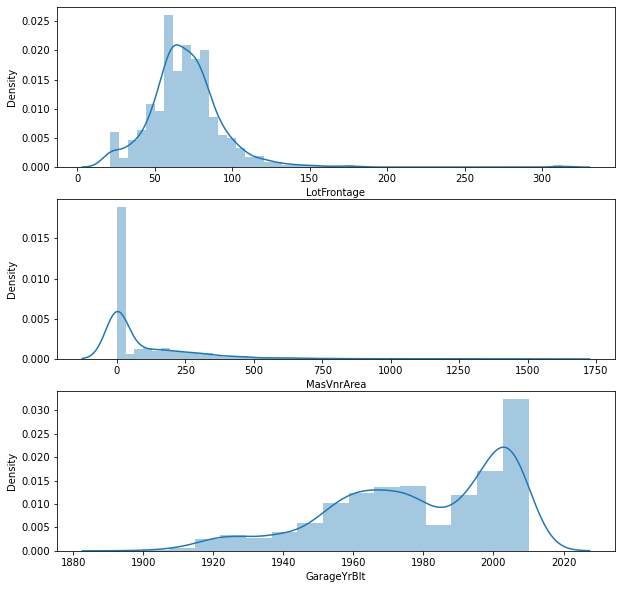

In [8]:
plt.figure(figsize=(10,10))
for i,j in enumerate(numis_df.columns):
    plt.subplot(3,1,i+1)
    sns.distplot(numis_df[j])

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
imputer=IterativeImputer(initial_strategy="median",n_nearest_features=10,imputation_order="ascending",max_iter=10)

numis_df=pd.DataFrame(imputer.fit_transform(numis_df),columns=numis_df.columns)


False


<Figure size 1440x360 with 0 Axes>

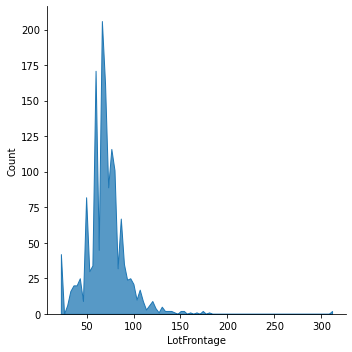

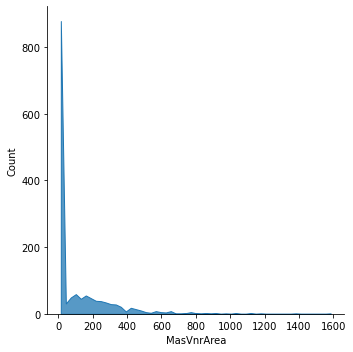

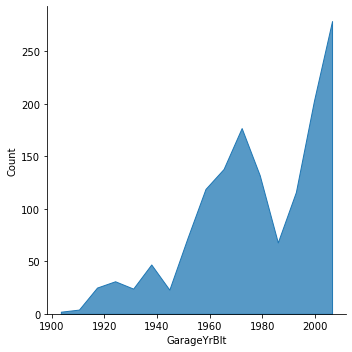

In [10]:
print(numis_df.isnull().sum().any())
plt.figure(figsize=(20,5))
for i in numis_df.columns:
    sns.displot(data=numis_df,x=i,element="poly")

In [11]:
df.update(numis_df)

In [12]:
#filling missing values of categorical variable
#step -1 (replacing na to none values becuase na in this case is not a missing values.b for more read document)

cat_df["GarageFinish"]=cat_df["GarageFinish"].fillna("none")
cat_df["GarageType"]=cat_df["GarageType"].fillna("None")
cat_df["MasVnrType"]=cat_df["MasVnrType"].fillna("None")
cat_df['BsmtQual']= cat_df['BsmtQual'].fillna('None')
cat_df['BsmtFinType1']= cat_df['BsmtFinType1'].fillna('None')
cat_df['BsmtExposure']= cat_df['BsmtExposure'].fillna('None')
cat_df.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond         37
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType        0
GarageFinish      0
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

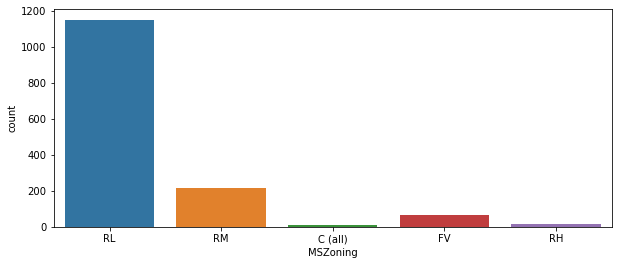

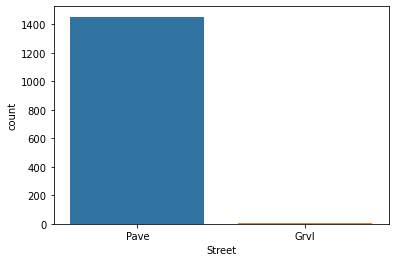

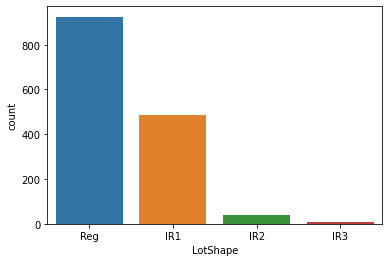

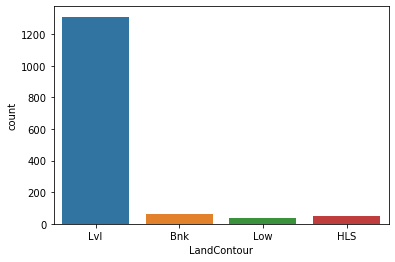

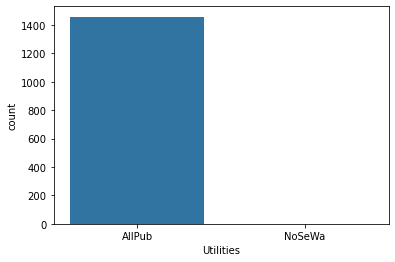

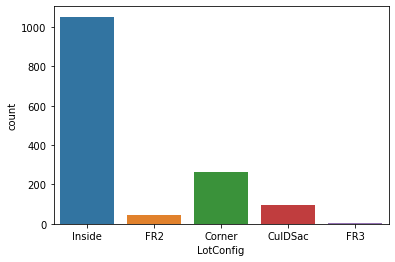

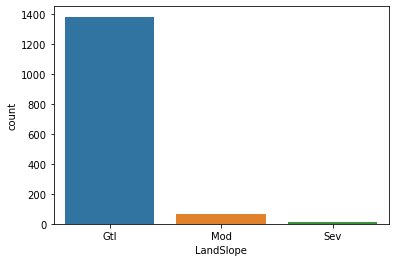

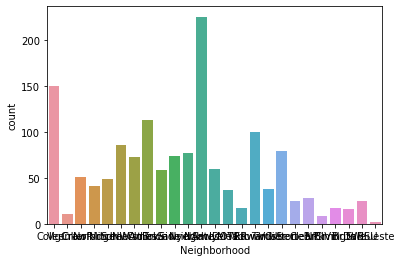

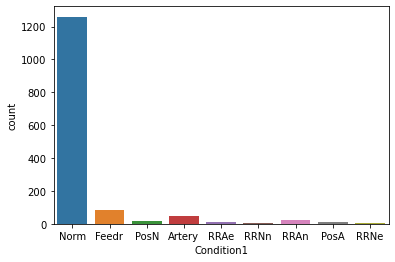

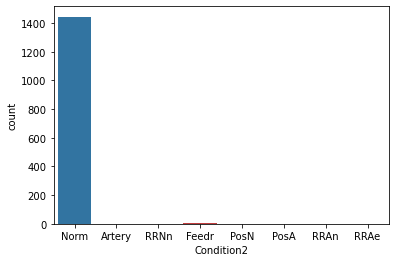

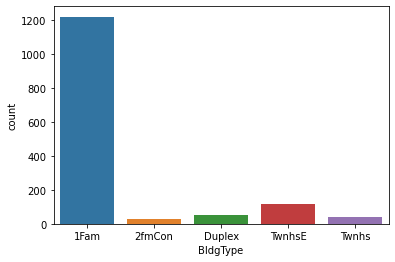

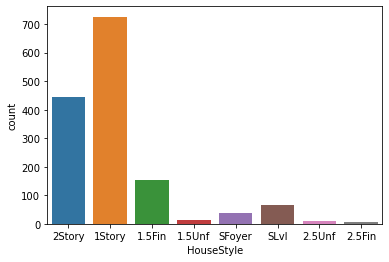

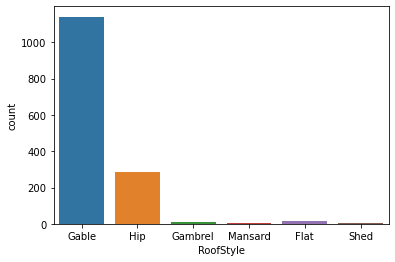

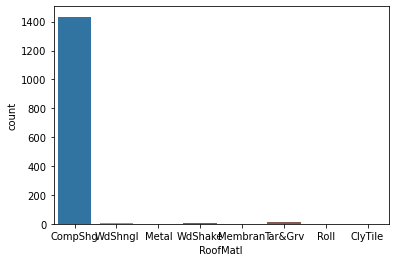

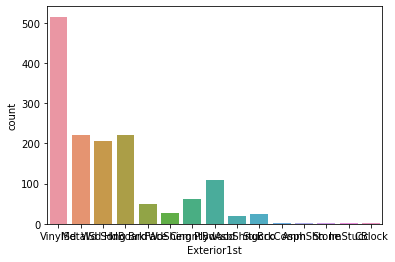

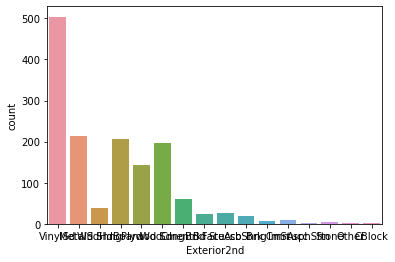

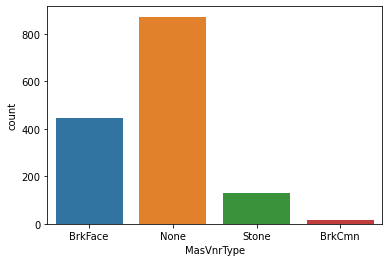

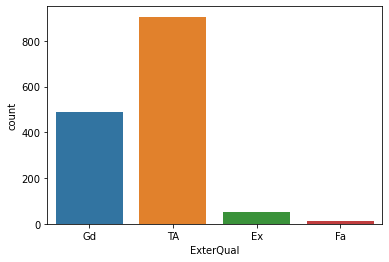

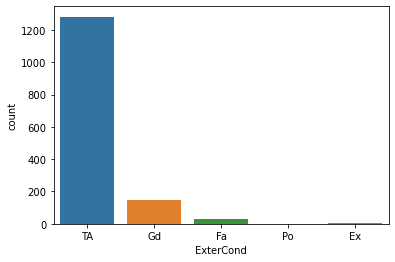

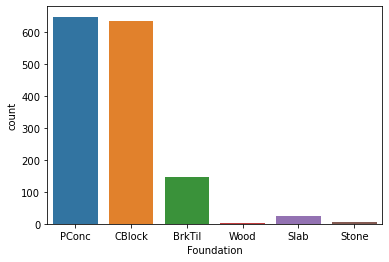

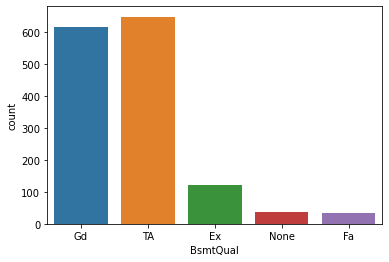

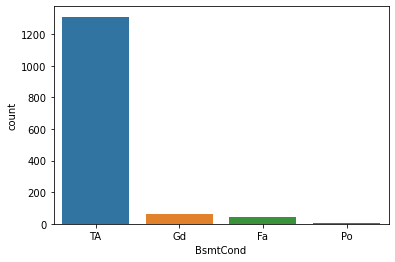

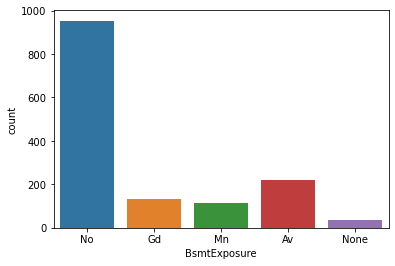

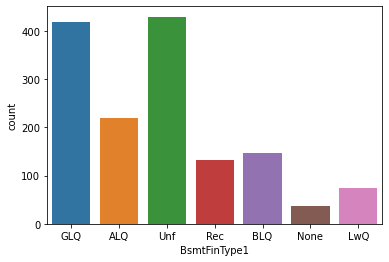

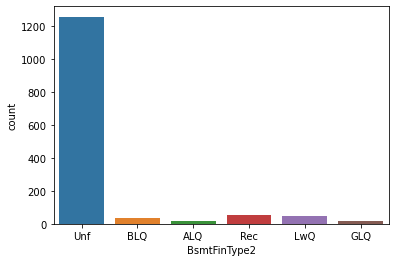

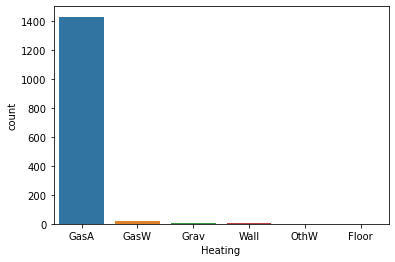

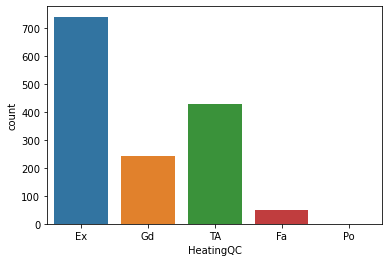

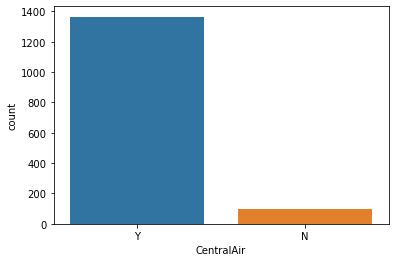

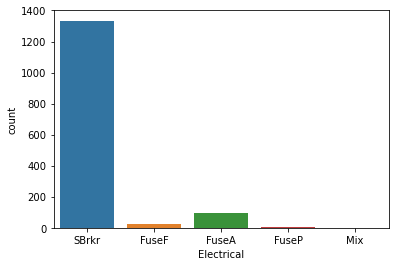

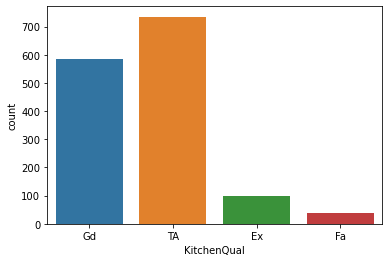

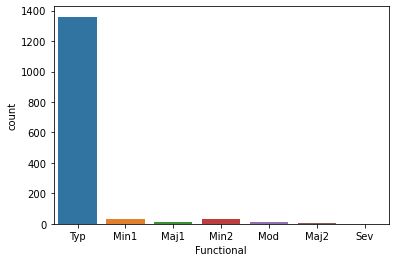

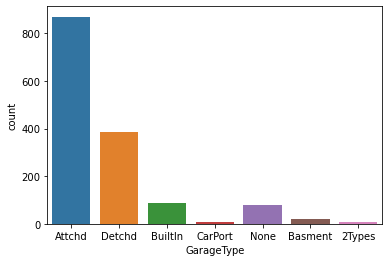

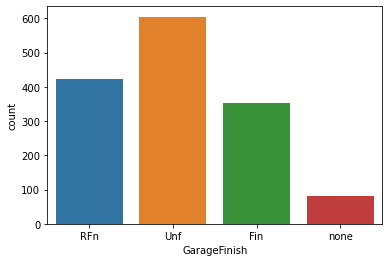

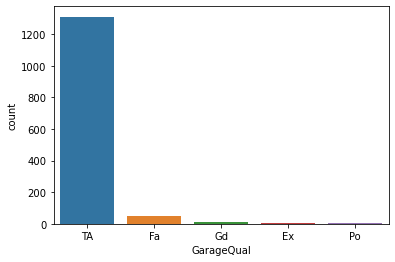

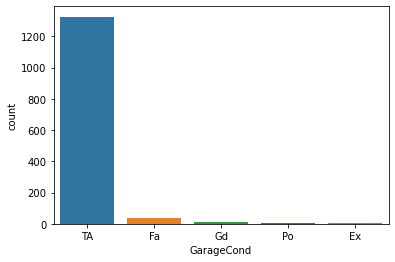

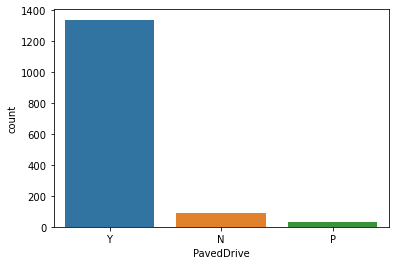

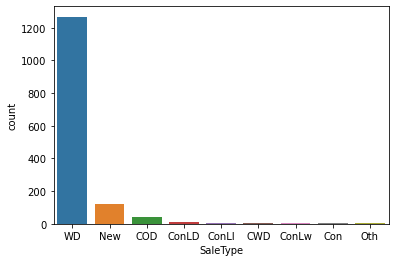

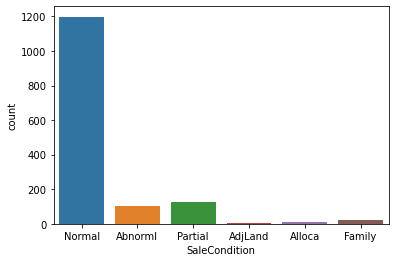

In [13]:
#exploring categorical variables
plt.figure(figsize=(10,4))
for i in cat_df.columns:
    sns.countplot(cat_df[i])
    plt.show()

In [14]:
usles_col=[]
for j in cat_df.columns:
    for i in range(len(cat_df[j].value_counts())):
        if cat_df[j].value_counts()[i]>=1000:
            usles_col.append(j)
df.drop(columns=usles_col,inplace=True)
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [15]:
#encoding ordinal features for training model (read document to find ordinal feature)
same_col=["ExterQual","BsmtQual","HeatingQC",'KitchenQual']
for i in same_col:
    cat_df[i]=cat_df[i].map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
    
cat_df["BsmtQual"].fillna(0,inplace=True)

cat_df["GarageFinish"]=cat_df["GarageFinish"].map({"None":0,"Unf":1,"RFn":2,"Fin":3})
cat_df["GarageFinish"].fillna(0,inplace=True)

cat_df["BsmtFinType1"]=cat_df["BsmtFinType1"].map({"None":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})

cat_df["BsmtExposure"]=cat_df["BsmtExposure"].map({"None":0,"No":1,"Mn":2,"Av":3,"Gd":4})

cat_df["HouseStyle"]=cat_df["HouseStyle"].map({'2Story':4, '1Story':1, '1.5Fin':3, '1.5Unf':2, 'SFoyer':7, 'SLvl':8, '2.5Unf':5,
       '2.5Fin':6})

cat_df["LotShape"]=cat_df["LotShape"].map({"IR3":1,"IR2":2,"IR1":3,"Reg":4})

In [16]:
cat_df.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond         37
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType        0
GarageFinish      0
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [17]:
df.update(cat_df)
to_intcol=["ExterQual","BsmtQual","HeatingQC",'KitchenQual','LotShape','HouseStyle','BsmtExposure','BsmtFinType1','GarageFinish','BsmtQual']
df[to_intcol]=df[to_intcol].astype("int64")

<AxesSubplot:>

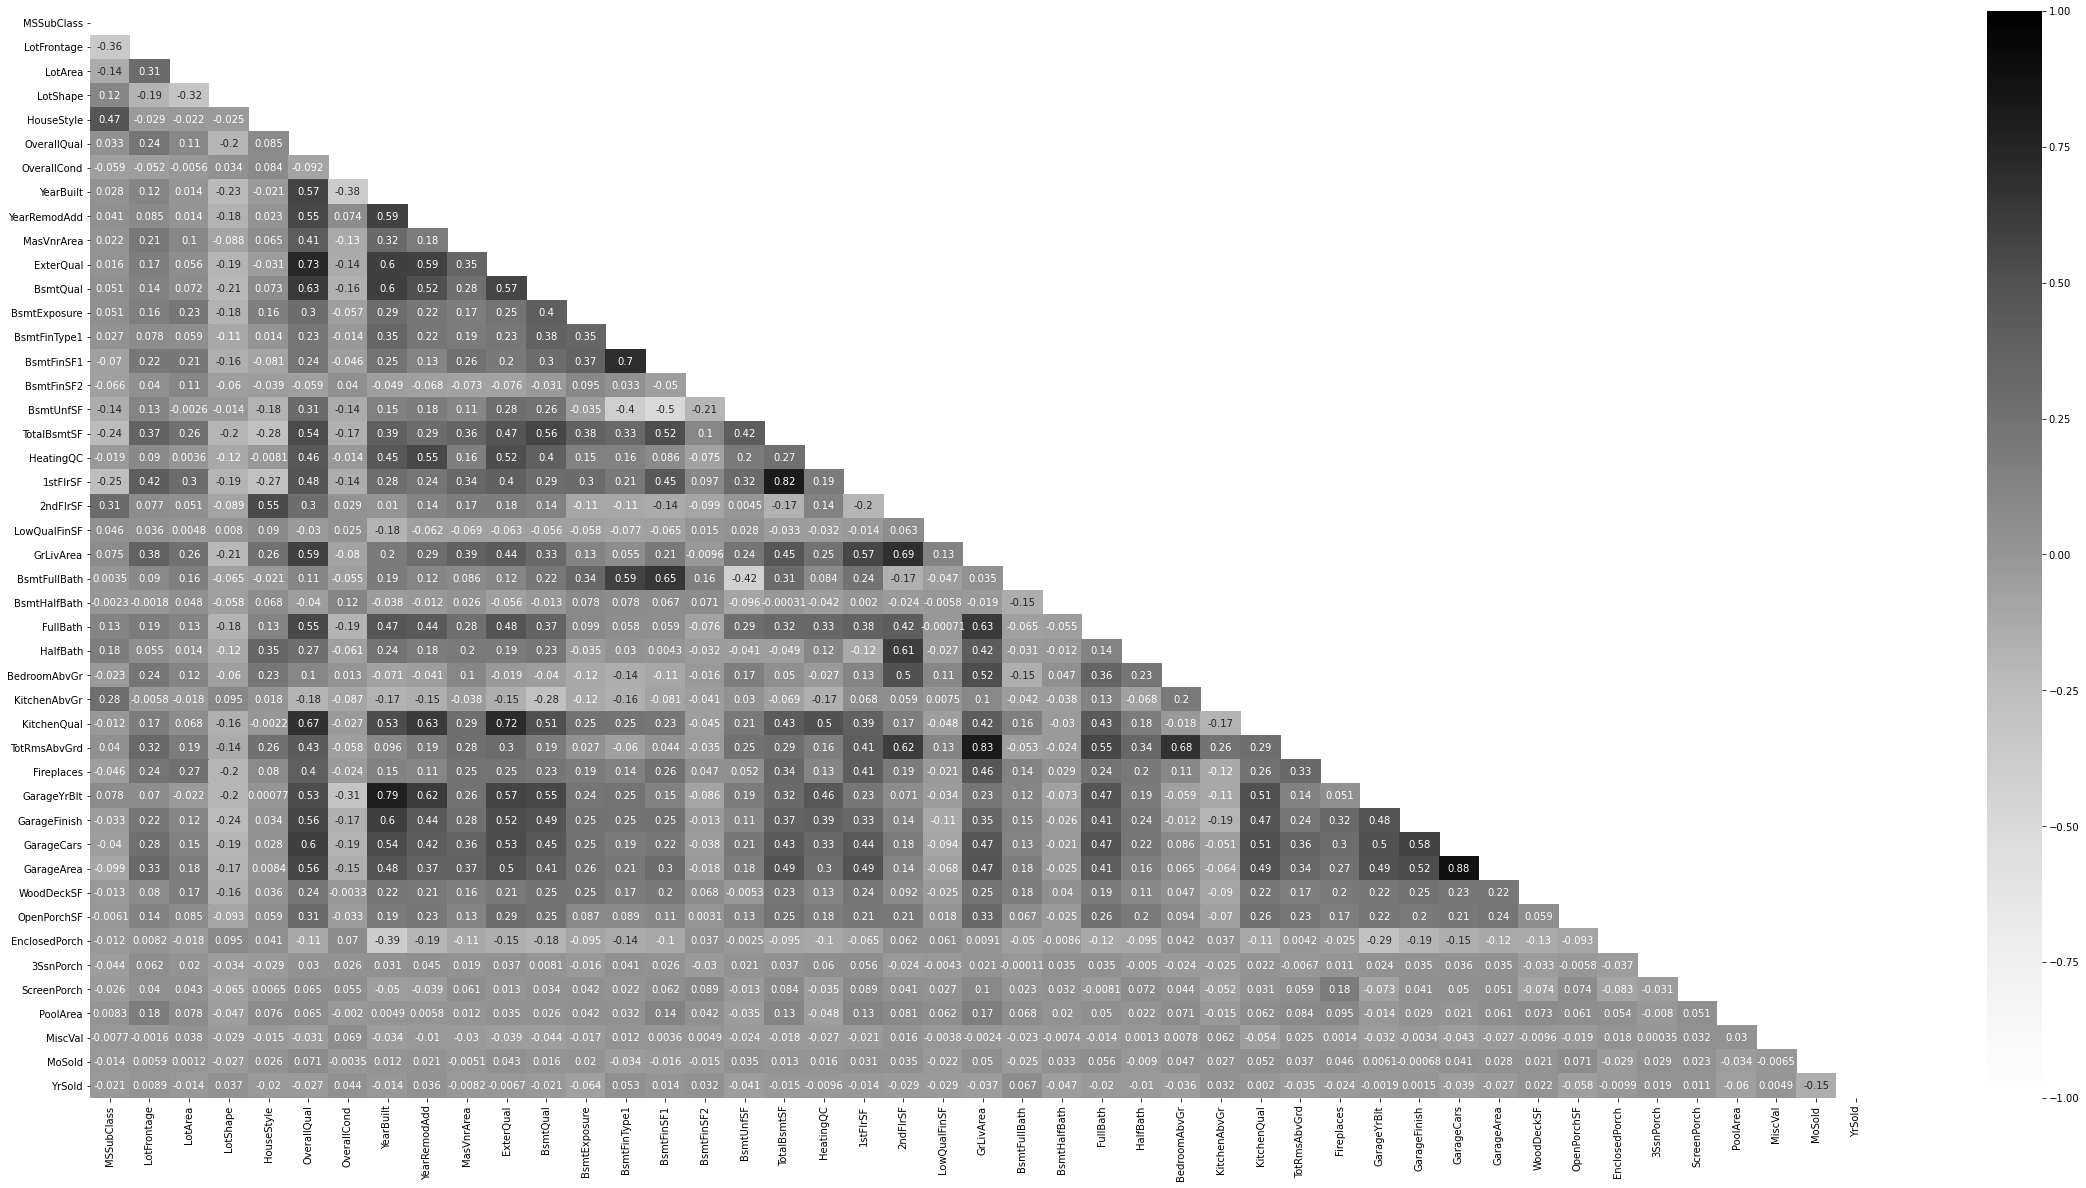

In [18]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),vmax=1,vmin=-1,cmap="Greys",annot=True,mask=np.triu(df.corr()))

In [19]:
corr=df.corr()
corr_col=set()
#columns which are corelated with each other
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j]>0.7):
            corr_col.add(corr.columns[i])
#columns which are losely related with target variable
cori=df.corrwith(df_y)
for d in range(len(cori)):
    if abs(cori[d]<0.05):
        cor_col.add(cori.keys()[0])
df.drop(columns=cor_col,inplace=True)

NameError: name 'cor_col' is not defined

In [ ]:
df_2=pd.get_dummies(df)

In [ ]:
for i in num_col:
    sns.boxplot(x=df_2[i],orient="h",palette="bright")
    plt.show()